In [267]:
import os
import numpy as np
import pandas as pd
import neattext as nt
from tqdm import tqdm
from colorama import Fore
import neattext.functions as nf
import matplotlib.pyplot as plt
from IPython.display import Image,display

In [268]:
from nltk import word_tokenize
from nltk.corpus import stopwords

In [269]:
from rouge import Rouge
from wordcloud import WordCloud
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.parsers.html import HtmlParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.lsa import LsaSummarizer 
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lex_rank import LexRankSummarizer

In [270]:
#This is a function to view the rouge result. That shows how good the summary is
def rouge(sys,ref):
    rouge=Rouge()
    scores=rouge.get_scores(sys,ref,avg=True)
    table=pd.DataFrame(scores)
    return table

In [271]:
#This function plots the 30 most frequent words in the original articles, the clean article, human-based summaries and LuhnS-based summaries.
def word_cloud_plot(df):
    plt.subplots(2,2,figsize=(18,5))
    plt.subplot(2,2,1)
    whole_text_1=' '.join(df['Article'].values) 
    word_cloud_1=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=30).generate(whole_text_1)
    plt.imshow(word_cloud_1,interpolation='bilinear')
    plt.title('Article',size=20,fontstyle='italic')
    plt.axis('off')
    
    plt.subplot(2,2,2) 
    whole_text_2=' '.join(df['Clean'].values)
    word_cloud_2=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=30).generate(whole_text_2)
    plt.imshow(word_cloud_2,interpolation='bilinear')
    plt.title('Article_Clean',size=20,fontstyle='italic')
    plt.axis('off')
 
    plt.subplot(2,2,3)
    whole_text_3=' '.join(df['Summary'].values)
    word_cloud_3=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=30).generate(whole_text_3)
    plt.imshow(word_cloud_3,interpolation='bilinear')
    plt.title('Article_Human_Summary',size=20,fontstyle='italic')
    plt.axis('off')
    
    plt.subplot(2,2,4)
    whole_text_4=' '.join(df['LuhnS'].values)
    word_cloud_4=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=30).generate(whole_text_4)
    plt.imshow(word_cloud_4,interpolation='bilinear')
    plt.title('Article_Machine_Summary',size=20,fontstyle='italic')
    plt.axis('off')
    
    plt.show()

In [272]:
#This function plots the 30 most frequent words in 4 different summary methods.
def word_cloud_Whole_summery_plot(df):

    plt.subplots(2,2,figsize=(18,5))
    plt.subplot(2,2,1)
    whole_text_1=' '.join(df['LexRankS'].values) 
    word_cloud_1=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=30).generate(whole_text_1)
    plt.imshow(word_cloud_1,interpolation='bilinear')
    plt.title('LexRankS',size=20,fontstyle='italic')
    plt.axis('off')
    
    plt.subplot(2,2,2) 
    whole_text_2=' '.join(df['LuhnS'].values)
    word_cloud_2=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=30).generate(whole_text_2)
    plt.imshow(word_cloud_2,interpolation='bilinear')
    plt.title('LuhnS',size=20,fontstyle='italic')
    plt.axis('off')
 
    plt.subplot(2,2,3)
    whole_text_3=' '.join(df['KLS'].values)
    word_cloud_3=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=30).generate(whole_text_3)
    plt.imshow(word_cloud_3,interpolation='bilinear')
    plt.title('KLS',size=20,fontstyle='italic')
    plt.axis('off')
    
    plt.subplot(2,2,4)
    whole_text_4=whole_text_2=' '.join(df['LsaS'].values)
    word_cloud_4=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=30).generate(whole_text_4)
    plt.imshow(word_cloud_4,interpolation='bilinear')
    plt.title('LsaS',size=20,fontstyle='italic')
    plt.axis('off')
    
    plt.show()

In [273]:
#This function plots the 30 most frequent words in each method.
def word_cloud_summery(df,col,name):
    whole_text_4=' '.join(df[col].values)
    word_cloud_4=WordCloud(stopwords=stopwords.words('english'),height=300,width=1200,background_color='white',max_words=50).generate(whole_text_4)
    plt.imshow(word_cloud_4,interpolation='bilinear')
    plt.title(name,size=15,fontstyle='italic')
    plt.axis('off')

In [274]:
#Summarize using the LexRankS method
def Summarizer_generator_LexRankS(text):
    language,sentences_count='english',3
    summary,summy=[],[]
    parser=PlaintextParser.from_string(text,Tokenizer(language))
    summarizer=LexRankSummarizer(Stemmer(language))
    summarizer.stop_words=get_stop_words(language)     
    for sent in summarizer(parser.document,sentences_count):
        summary.append(str(sent))
    summary = ' '.join(summary)
    summy.append(summary)
    result=' '.join(summy)
    return result

In [275]:
#Summarize using the LuhnS method
def Summarizer_generator_LuhnS(text):
    language,sentences_count='english',3
    summary,summy=[],[]
    parser=PlaintextParser.from_string(text,Tokenizer(language))
    summarizer=LuhnSummarizer()
    summarizer.stop_words=get_stop_words(language)     
    for sent in summarizer(parser.document,sentences_count):
        summary.append(str(sent))
    summary = ' '.join(summary)
    summy.append(summary)
    result=' '.join(summy)
    return result

In [276]:
#Summarize using the LsaS method
def Summarizer_generator_LsaS(text):
    language,sentences_count='english',3
    summary,summy=[],[]
    parser=PlaintextParser.from_string(text,Tokenizer(language))
    summarizer=LsaSummarizer()
    summarizer.stop_words=get_stop_words(language)     
    for sent in summarizer(parser.document,sentences_count):
        summary.append(str(sent))
    summary = ' '.join(summary)
    summy.append(summary)
    result=' '.join(summy)
    return result

In [277]:
#Summarize using the KLS method
def Summarizer_generator_KLS(text):
    language,sentences_count='english',3
    summary,summy=[],[]
    parser=PlaintextParser.from_string(text,Tokenizer(language))
    summarizer=KLSummarizer()
    summarizer.stop_words=get_stop_words(language)     
    for sent in summarizer(parser.document,sentences_count):
        summary.append(str(sent))
    summary = ' '.join(summary)
    summy.append(summary)
    result=' '.join(summy)
    return result

In [278]:
#Average length of each summary
def length(list_len):
    list_len.plot.bar(color='#8B7B8B')
    plt.tick_params(axis='x', rotation=30)
    plt.ylabel('Average Length')
    plt.show()

In [279]:
#Compare of sample and 4 different summaries generated with summary library functions.
def com(num):
    if num==1:
        print('\t\t\t\t\t\tSummary by LsaS\n' )
        print(Fore.RESET+'The Seoul Southern District Prosecutors\' Office said it would work with Serbia to detain him.'+Fore.MAGENTA+'Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.'+Fore.RESET+'In September Interpol issued an international warrant for his arrest.'+Fore.MAGENTA+'The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters. The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.'+Fore.RESET+'South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.')
    elif num==2:
        print('\t\t\t\t\t\tSummary by LuhnS\n' )
        print(Fore.RESET+'The Seoul Southern District Prosecutors\' Office said it would work with Serbia to detain him.'+'Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.'+'In September Interpol issued an international warrant for his arrest.'+Fore.MAGENTA+'The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters. The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.'+'South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.'+Fore.RESET)
    elif num==3:
        print('\t\t\t\t\t\tSummary by LexRankS\n' )
        print(Fore.MAGENTA+'The Seoul Southern District Prosecutors\' Office said it would work with Serbia to detain him.'+'Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.'+'In September Interpol issued an international warrant for his arrest.'+Fore.RESET+'The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters. The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.'+'South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.')
    elif num==4:
        print('\t\t\t\t\t\tSummary by KLS\n' )
        print(Fore.RESET+'The Seoul Southern District Prosecutors\' Office said it would work with Serbia to detain him.'+Fore.MAGENTA+'Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.'+'In September Interpol issued an international warrant for his arrest.'+Fore.RESET+'The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters.'+Fore.MAGENTA+' The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.'+Fore.RESET+'South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.')


In [280]:
#Description for users how to see the results
def start():
    print(Fore.RESET+'\n\t\t\t\t\tSUMMARIZING BBC NEWS')
    print('\t\t\tCall below options from "all_results()" function to see the results:')
    print(Fore.MAGENTA+18*'======',Fore.RESET)
    print('About Project===================> \'des\'\t\tRouge tables ========================================> \'ml\'')
    print('First data =====================> \'tb1\'\t\tData after summarization ============================> \'tb2\'')
    print('Word cloud plot ================> \'w.c\'\t\tWord cloud plot for all model togheder ==============> \'w.c.all\'')
    print('Compar rouge tables ============> \'compar\'\tCompar rouge tables for best model for each class ===> \'compar.c\'')
    print('Compar model\'s length ==========> \'len\'\t\tSee a sample ========================================> \'test\'')
    print('\t\t\t\t\t\tCompar sample and 4 different summaries generated ===> \'t.all\'')

In [281]:
#Description about project
def description():
    print(Fore.LIGHTBLUE_EX +'\nProject idea:\t'+Fore.RESET+'1. Using news summaries for classification instead of original news.\n\t\t2. Impact of text cleaning on classification\n')
    print(Fore.MAGENTA+17*'======',Fore.RESET)
    print(Fore.LIGHTBLUE_EX +'\nDatabase:\t'+Fore.RESET+'2224 news and news summaries prepared by the BBC\n')
    print(Fore.MAGENTA+17*'======',Fore.RESET)
    print(Fore.LIGHTBLUE_EX +'\nProcess:\t'+Fore.RESET+'1. pre-processing.\n\t\t2. Summarizing news using four different functions in the Sumy library.\n\t\t3. Check the results using Rouge() and select the best summary\n\t\t4. Create neural network model for original news, best news summary and clean news.\n')
    print(Fore.MAGENTA+17*'======',Fore.RESET)
    print(Fore.LIGHTBLUE_EX +'\nNew concepts:\t'+Fore.RESET+'1. Sumy\n\t\t2. Word Cloud\n\t\t3. Text Cleaning\n\t\t4. Rouge() ')

In [282]:
#Reading  and saveing articles
org_article=[]
data_path='/Users/najmehakbari/Downloads/BBC_News_Summary/BBC News Summary/News Articles'
for topic in os.listdir(data_path):
    topic_path=os.path.join(data_path,topic)
    if '.DS_Store' not in topic_path:
        for file_path in os.listdir(topic_path):
            try:
                with open(f'{topic_path}/{file_path}','r') as f:
                    org_article.append((f.read(),topic_path.split('/')[-1]))
            except UnicodeDecodeError :
                print(f'file {file_path} in {topic_path} not readable')

file .DS_Store in /Users/najmehakbari/Downloads/BBC_News_Summary/BBC News Summary/News Articles/sport not readable


In [283]:
#Reading  and saveing summaries
org_sum=[]
sum_path='/Users/najmehakbari/Downloads/BBC_News_Summary/BBC News Summary/Summaries'
for topic in os.listdir(sum_path):
    topic_path=os.path.join(sum_path,topic)
    if '.DS_Store' not in topic_path:
        for file_path in os.listdir(topic_path):
            try:
                with open(f'{topic_path}/{file_path}','r') as f:
                    org_sum.append((f.read(),topic_path.split('/')[-1]))
            except UnicodeDecodeError :
                print(f'file {file_path} in {topic_path} not readable')

file .DS_Store in /Users/najmehakbari/Downloads/BBC_News_Summary/BBC News Summary/Summaries/sport not readable


In [284]:
#creating a dataframe for whole data
df1=pd.DataFrame(org_article,columns=['Article','Category'])
df2=pd.DataFrame(org_sum,columns=['Summary','Category'])
df3=pd.concat([df1, df2], axis=1)
df=df3.iloc[:,:-1]
original_data=df.copy()

#Replace class names with numeric variables
df['Category']=df['Category'].replace(['business','entertainment','politics','sport','tech'],[0,1,2,3,4])

In [285]:
#Cleaning texts by removing numbers, currency, extra spaces and stopwords
df['Clean']=df['Article'].apply(nf.remove_currencies)
df['Clean']=df['Clean'].apply(nf.remove_numbers)
df['Clean']=df['Clean'].apply(nf.remove_special_characters)
df['Clean']=df['Clean'].apply(nf.remove_special_characters)
df['Clean']=df['Clean'].apply(nf.remove_stopwords)
df['Clean']=df['Clean'].apply(lambda x: nf.remove_custom_pattern(x,term_pattern=r'%'))
df['Clean']=df['Clean'].apply(nf.remove_multiple_spaces)

In [286]:
#Apply the LexRankS Summarizer to the articles and save in a LexRankS column
df['LexRankS']=df['Article'].apply(Summarizer_generator_LexRankS)
#Apply the LuhnS Summarizer to the articles and save in a LuhnS column
df['LuhnS']=df['Article'].apply(Summarizer_generator_LuhnS)
#Apply the LsaS Summarizer to the articles and save in a LsaS column
df['LsaS']=df['Article'].apply(Summarizer_generator_LsaS)
#Apply the KLS Summarizer to the articles and save in a KLS column
df['KLS'] = df['Article'].apply(Summarizer_generator_KLS)

In [287]:
#Compute rouge for LexRankS and Summary columns for comparison
LexRankS=rouge(df['LexRankS'],df['Summary'])
LexRS=LexRankS.add_suffix('_LexRankS')
#Compute rouge for LuhnS and Summary columns for comparison
LuhnS=rouge(df['LuhnS'],df['Summary'])
LuhnS=LuhnS.add_suffix('_LuhnS')
#Compute rouge for LsaS and Summary columns for comparison
LsaS=rouge(df['LsaS'],df['Summary'])
LsaS=LsaS.add_suffix('_LsaS')
#Compute rouge for KLS and Summary columns for comparison
KLS=rouge(df['KLS'],df['Summary'])
KLS=KLS.add_suffix('_KLS')

In [288]:
#LsaS has the best result. Let's see the result of this model for each class.
#Compute rouge for LsaS and Summary columns for politics class
politics=df[df['Category']==0]
pol=rouge(politics['LsaS'],politics['Summary'])
pol=pol.add_suffix('_pol')

#Compute rouge for LsaS and Summary columns for entertainment class
entertainment=df[df['Category']==1]
ent=rouge(entertainment['LsaS'],entertainment['Summary'])
ent=ent.add_suffix('_ent')

#Compute rouge for LsaS and Summary columns for business class
business=df[df['Category']==2]
bus=rouge(business['LsaS'],business['Summary'])
bus=bus.add_suffix('_bus')

#Compute rouge for LsaS and Summary columns for sport class
sport=df[df['Category']==3]
sport=rouge(sport['LsaS'],sport['Summary'])
sport=sport.add_suffix('_sport')

#Compute rouge for LsaS and Summary columns for tech class
tech=df[df['Category']==4]
tech=rouge(tech['LsaS'],tech['Summary'])
tech=tech.add_suffix('_tech')

In [289]:
#I created a dataframe with the average of all rouge from all models to compare.
compar_model=pd.concat([LexRS,LuhnS,LsaS,KLS],axis="columns")

#LsaS has the best result. Let's see the result of this model for each class by creating a dataframe.
compar_category=pd.concat([pol,ent,bus,sport,tech],axis="columns")

In [290]:
#Create a dataframe of the total length sum of each model.
dflen=df.copy()
dflen[dflen.columns[0]]=dflen[dflen.columns[0]].apply(lambda x: len(x))
dflen[dflen.columns[2]]=dflen[dflen.columns[2]].apply(lambda x: len(x))
dflen[dflen.columns[3]]=dflen[dflen.columns[3]].apply(lambda x: len(x))
dflen[dflen.columns[4]]=dflen[dflen.columns[4]].apply(lambda x: len(x))
dflen[dflen.columns[5]]=dflen[dflen.columns[5]].apply(lambda x: len(x))
dflen[dflen.columns[6]]=dflen[dflen.columns[6]].apply(lambda x: len(x))
dflen[dflen.columns[7]]=dflen[dflen.columns[7]].apply(lambda x: len(x))

In [293]:
#Calculate the average length ratio of each model and original article.
len_summary=(dflen['Summary']/dflen['Article']).mean()
#len_clean=(dflen['Clean']/dflen['Article']).mean()
len_lexRankS=(dflen['LexRankS']/dflen['Article']).mean()
len_luhnS=(dflen['LuhnS']/dflen['Article']).mean()
len_lsaS=(dflen['LsaS']/dflen['Article']).mean()
len_kLS=(dflen['KLS']/dflen['Article']).mean()

list_len=[1,len_summary,len_kLS,len_lsaS,len_luhnS,len_lexRankS]
index=['Article','Summary','LsaS','KLS','LuhnS','LexRankS']
list_len=pd.DataFrame(sorted(list_len,reverse=True), index=index)
list_len.rename(columns={0:'Len_Average'})

,Len_Average
Article,1.000000
Summary,0.441835
LsaS,0.258220
KLS,0.228982
LuhnS,0.199630
LexRankS,0.181202


In [294]:
df.to_csv('sumy.news.csv')

In [295]:
#This text was used to see the results of 4 implemented models. Comparison of summaries and this text is done manually.
text='''The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him.

Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.

In September Interpol issued an international warrant for his arrest.

The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters.

The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.

South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.'''


In [296]:
img=Image(filename='7887982.png')

In [297]:
#This is a function for easy view all results. 
#Users can easily view any part of the result by calling any option described in the start function.

def all_results(step):
    if step=='start':
        return start()
    elif step=='des':
        description()
    elif step == 'tb1':
        display(img)
        print('   We have 2224 news and their summaries in 5 different categories.\n')
        return original_data
    elif step == 'tb2':
        display(img)
        print('   I have made 4 different summaries for each news by using Sumy functions\n')
        return df.iloc[:,4:]
    elif step=='ml':
        display(img)
        print('   I have made 4 different summaries for each news by using Sumy functions\n',15*'=====','\n')
        print (f'{LexRS}\n\n{LuhnS}\n\n{LsaS}\n\n{KLS}')
    elif step=='len':
        display(img)
        print('   On average, the length of LuhnS is about half the length of a human-made summaries.')
        return dflen.head(),length(list_len)
    elif step=='compar':
        display(img)
        print('   As we can see, LuhnS has the best result compared to others.')
        return compar_model
    elif step=='compar.c':
        display(img)
        print('   This table shows the result of LuhnS rouge for each category. It works best in sports.')
        return compar_category
    elif step=='w.c':
        word_cloud_plot(df)
    elif step=='w.c.all':
        return word_cloud_Whole_summery_plot(df)
    elif step=='test':
        display(img)
        print('   I tried to summarize a sample text with 4 different functions above\n',21*'=====','\n')
        print(Fore.MAGENTA+'\t\t\t\t______________. Original Text .______________\n\n',Fore.RESET+text)
        print(Fore.MAGENTA+'\t\t\t\t______________. Summary by LsaS .______________\n\n',Fore.RESET+Summarizer_generator_LsaS(text))
        print(Fore.MAGENTA+'\t\t\t\t______________. Summary by LuhnS .______________\n\n',Fore.RESET+Summarizer_generator_LuhnS(text))
        print(Fore.MAGENTA+'\t\t\t\t______________. Summary by LexRankS .______________\n\n',Fore.RESET+Summarizer_generator_LexRankS(text))
        print(Fore.MAGENTA+'\t\t\t\t______________. Summary by KLS .______________\n\n',Fore.RESET+Summarizer_generator_KLS(text))
    elif step=='t.all':
        display(img)
        print('   I have checked the result manually. The color purple is the summary. As we can see, the results are different.\n',20*'=====','\n')
        return com(1),com(2),com(3),com(4)

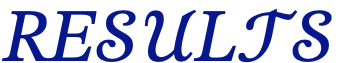

In [298]:
start()


					SUMMARIZING BBC NEWS
			Call below options from "all_results()" function to see the results:
About Project===================> 'des'		Rouge tables ========================================> 'ml'
First data =====================> 'tb1'		Data after summarization ============================> 'tb2'
Word cloud plot ================> 'w.c'		Word cloud plot for all model togheder ==============> 'w.c.all'
Compar rouge tables ============> 'compar'	Compar rouge tables for best model for each class ===> 'compar.c'
Compar model's length ==========> 'len'		See a sample ========================================> 'test'
						Compar sample and 4 different summaries generated ===> 't.all'


In [299]:
all_results('des')


Project idea:	1. Using news summaries for classification instead of original news.
		2. Impact of text cleaning on classification


Database:	2224 news and news summaries prepared by the BBC


Process:	1. pre-processing.
		2. Summarizing news using four different functions in the Sumy library.
		3. Check the results using Rouge() and select the best summary
		4. Create neural network model for original news, best news summary and clean news.


New concepts:	1. Sumy
		2. Word Cloud
		3. Text Cleaning
		4. Rouge() 


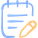

   We have 2224 news and their summaries in 5 different categories.



,Article,Category,Summary
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment,Nigel McCune from the Musicians' Union said Br...
1,"U2's desire to be number one\n\nU2, who have w...",entertainment,But they still want more.They have to want to ...
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment,"Babyshambles, which he formed after his acrimo..."
3,Snicket tops US box office chart\n\nThe film a...,entertainment,A Series of Unfortunate Events also stars Scot...
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment,"Ocean's Twelve, the crime caper sequel starrin..."
...,...,...,...
2219,Warning over Windows Word files\n\nWriting a M...,tech,Writing a Microsoft Word document can be a dan...
2220,Fast lifts rise into record books\n\nTwo high-...,tech,The lifts take only 30 seconds to whisk passen...
2221,Nintendo adds media playing to DS\n\nNintendo ...,tech,Nintendo is releasing an adapter for its DS ha...
2222,Fast moving phone viruses appear\n\nSecurity f...,tech,The new strains of the Cabir mobile phone viru...


In [300]:
all_results('tb1')

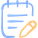

   I have made 4 different summaries for each news by using Sumy functions



,LexRankS,LuhnS,LsaS,KLS
0,Musicians' groups are to tackle US visa regula...,Musicians' groups are to tackle US visa regula...,A sponsor has to make a petition on their beha...,The Musicians' Union stance is being endorsed ...
1,But such success is down to more than music. V...,"Their new album, How To Dismantle An Atomic Bo...",The group were born when Mullen put an appeal ...,"Vertigo, the first single from the new album, ..."
2,"Babyshambles played for 5,000 fans at London's...","Babyshambles played for 5,000 fans at London's...","On Tuesday, Doherty and his three bandmates we...","Babyshambles, which he formed after his acrimo..."
3,The film adaptation of Lemony Snicket novels h...,Snicket tops US box office chart The film adap...,The film adaptation of Lemony Snicket novels h...,Snicket tops US box office chart The film adap...
4,"Ocean's Twelve, the crime caper sequel starrin...",Ocean's Twelve raids box office Ocean's Twelve...,"Ocean's Twelve, the crime caper sequel starrin...","Ocean's Twelve, the crime caper sequel starrin..."
...,...,...,...,...
2219,Writing a Microsoft Word document can be a dan...,Writing a Microsoft Word document can be a dan...,The problem is particularly acute with documen...,Sensitive information inadvertently leaked in ...
2220,Two high-speed lifts at the world's tallest bu...,The lifts also have a pressure control system ...,The lifts also have a pressure control system ...,The key new technologies applied in the world'...
2221,Nintendo is releasing an adapter for its DS ha...,Nintendo is releasing an adapter for its DS ha...,The add-on for the DS means people can downloa...,The release of the media add-on is an attempt ...
2222,Security firms are warning about several mobil...,Security firms are warning about several mobil...,The risk of being infected by Cabir is low bec...,Fast moving phone viruses appear Security firm...


In [301]:
all_results('tb2')

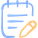

   I have made 4 different summaries for each news by using Sumy functions

   rouge-1_LexRankS  rouge-2_LexRankS  rouge-l_LexRankS
r          0.382296          0.287193          0.376860
p          0.801049          0.698661          0.789563
f          0.503085          0.392983          0.495936

   rouge-1_LuhnS  rouge-2_LuhnS  rouge-l_LuhnS
r       0.411691       0.319936       0.406915
p       0.814152       0.723448       0.804668
f       0.533561       0.429213       0.527349

   rouge-1_LsaS  rouge-2_LsaS  rouge-l_LsaS
r      0.410429      0.291090      0.399980
p      0.632159      0.513558      0.616386
f      0.486359      0.360009      0.474090

   rouge-1_KLS  rouge-2_KLS  rouge-l_KLS
r     0.358379     0.248812     0.349191
p     0.630113     0.507035     0.615135
f     0.446828     0.324209     0.435699


In [302]:
all_results('ml')

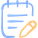

   As we can see, LuhnS has the best result compared to others.


,rouge-1_LexRankS,rouge-2_LexRankS,rouge-l_LexRankS,rouge-1_LuhnS,rouge-2_LuhnS,rouge-l_LuhnS,rouge-1_LsaS,rouge-2_LsaS,rouge-l_LsaS,rouge-1_KLS,rouge-2_KLS,rouge-l_KLS
r,0.382296,0.287193,0.376860,0.411691,0.319936,0.406915,0.410429,0.291090,0.399980,0.358379,0.248812,0.349191
p,0.801049,0.698661,0.789563,0.814152,0.723448,0.804668,0.632159,0.513558,0.616386,0.630113,0.507035,0.615135
f,0.503085,0.392983,0.495936,0.533561,0.429213,0.527349,0.486359,0.360009,0.474090,0.446828,0.324209,0.435699


In [303]:
all_results('compar')

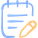

   This table shows the result of LuhnS rouge for each category. It works best in sports.


,rouge-1_pol,rouge-2_pol,rouge-l_pol,rouge-1_ent,rouge-2_ent,rouge-l_ent,rouge-1_bus,rouge-2_bus,rouge-l_bus,rouge-1_sport,rouge-2_sport,rouge-l_sport,rouge-1_tech,rouge-2_tech,rouge-l_tech
r,0.422565,0.298519,0.412365,0.432520,0.315382,0.422057,0.375719,0.255515,0.363933,0.462162,0.352465,0.453627,0.344031,0.217197,0.332231
p,0.603813,0.485910,0.589822,0.608827,0.496312,0.594242,0.635880,0.510065,0.616897,0.678598,0.575852,0.666144,0.627738,0.489728,0.607673
f,0.489344,0.362394,0.477791,0.496461,0.376305,0.484517,0.462324,0.330648,0.448078,0.535615,0.421964,0.525778,0.435189,0.293023,0.420656


In [304]:
all_results('compar.c')

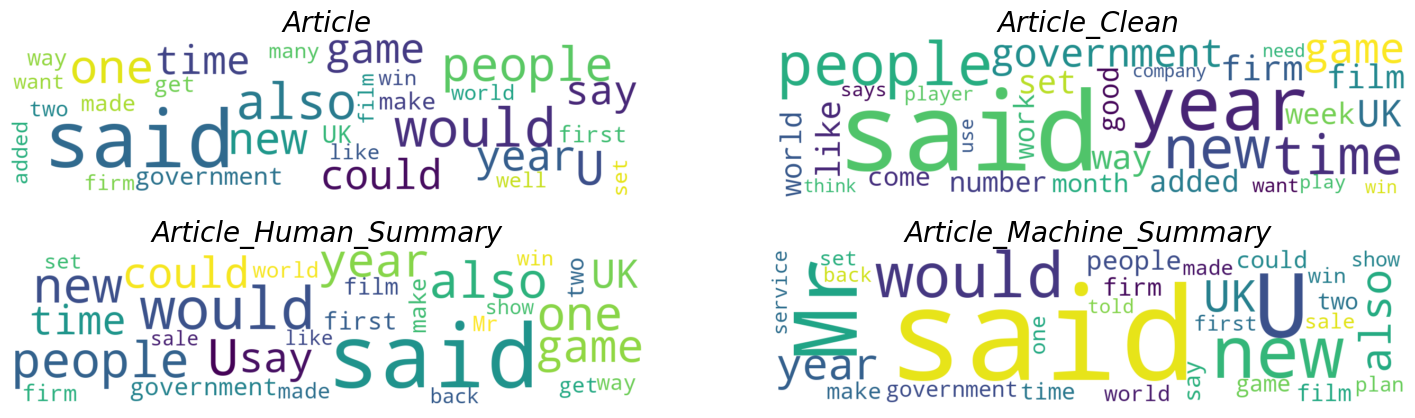

In [305]:
all_results('w.c')

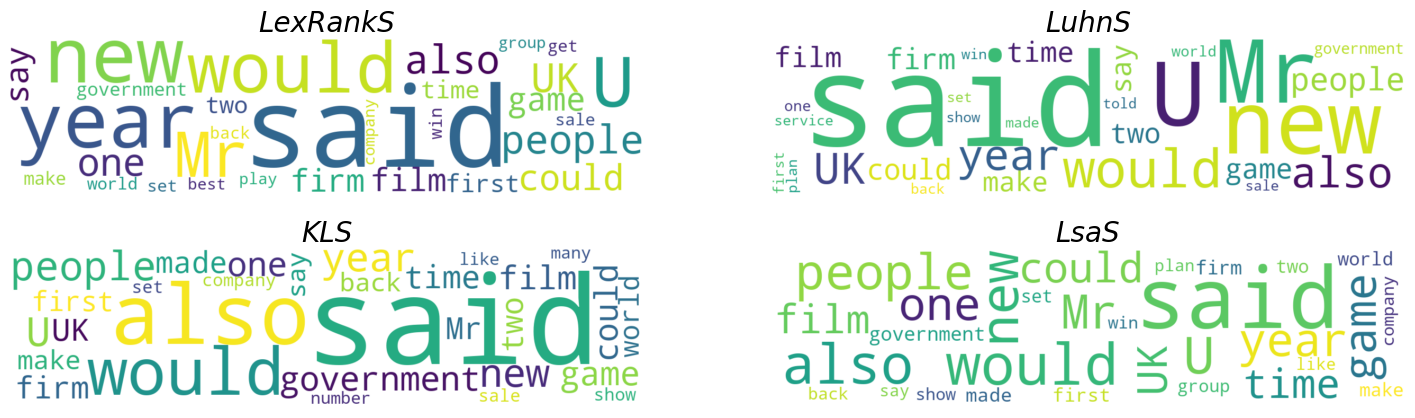

In [306]:
all_results('w.c.all')

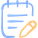

   On average, the length of LuhnS is about half the length of a human-made summaries.


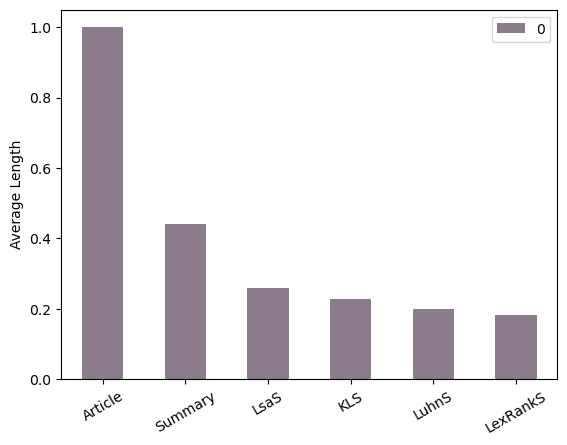

(   Article  Category  Summary  Clean  LexRankS  LuhnS  LsaS  KLS
 0     2260         1      991   1389       415    360   597  601
 1     4810         1     2147   2827       373    426   687  632
 2     2126         1      874   1349       187    354   476  463
 3     1044         1      434    722       372    243   345  291
 4     1581         1      799   1054       450    341   442  415,
 None)

In [307]:
all_results('len')

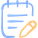

   I tried to summarize a sample text with 4 different functions above

				______________. Original Text .______________

 The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him.

Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.

In September Interpol issued an international warrant for his arrest.

The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters.

The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.

South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.
				______________. Summary by LsaS .______________

 Mr Kwon, 31, was charged with fraud and breaches of cap

In [308]:
all_results('test')

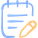

   I have checked the result manually. The color purple is the summary. As we can see, the results are different.

						Summary by LsaS

The Seoul Southern District Prosecutors' Office said it would work with Serbia to detain him.Mr Kwon, 31, was charged with fraud and breaches of capital markets law after the tokens imploded in May.In September Interpol issued an international warrant for his arrest.The following month, South Korean prosecutors said he had travelled via Dubai to an unknown country after leaving Singapore, where his company Terraform had its headquarters. The Interpol "Red Notice" is a request to law enforcement worldwide to locate and provisionally arrest a person pending extradition, surrender, or similar legal action.South Korea and Serbia do not have an extradition treaty but in the past both have agreed to requests under the European Convention on Extradition.
						Summary by LuhnS

The Seoul Southern District Prosecutors' Office said it would work with Serbia t

(None, None, None, None)

In [309]:
all_results('t.all')